<a href="https://colab.research.google.com/github/monindew/study.../blob/main/pandas_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv

--2024-08-29 01:03:29--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257694 (252K) [text/plain]
Saving to: ‘04-01-2020.csv’

04-01-2020.csv      100%[===================>] 251.65K  --.-KB/s    in 0.04s   

2024-08-29 01:03:29 (6.36 MB/s) - ‘04-01-2020.csv’ saved [257694/257694]



In [3]:
doc = pd.read_csv("04-01-2020.csv")

In [4]:
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,4,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,46,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,7,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,192,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [5]:
doc.shape

(2522, 12)

In [6]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2175 non-null   float64
 1   Admin2          2221 non-null   object 
 2   Province_State  2338 non-null   object 
 3   Country_Region  2522 non-null   object 
 4   Last_Update     2522 non-null   object 
 5   Lat             2518 non-null   float64
 6   Long_           2518 non-null   float64
 7   Confirmed       2522 non-null   int64  
 8   Deaths          2522 non-null   int64  
 9   Recovered       2522 non-null   int64  
 10  Active          2522 non-null   int64  
 11  Combined_Key    2522 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 236.6+ KB


In [7]:
doc.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [8]:
doc.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2175.000000,2518.000000,2518.000000,2522.000000,2522.000000,2522.000000,2522.000000
mean,30114.640920,35.289228,-75.615792,372.307296,20.477002,76.656622,278.524187
std,15643.080021,12.149460,47.809329,4174.952692,363.948042,1494.960160,2945.050096
min,1001.000000,-71.949900,-175.198200,0.000000,0.000000,0.000000,0.000000
25%,18052.000000,33.086811,-94.749118,2.000000,0.000000,0.000000,2.000000
50%,29031.000000,37.526763,-86.065254,7.000000,0.000000,0.000000,6.000000
75%,45024.000000,41.406878,-79.042655,34.000000,1.000000,0.000000,31.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


In [9]:
numeric_doc = doc.select_dtypes(include=['float64', 'int64'])
numeric_doc.corr()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.160717,0.171490,-0.000504,0.076467,NaN,0.002718
Lat,0.160717,1.000000,-0.476426,0.029389,0.026309,-0.002781,0.035631
Long_,0.171490,-0.476426,1.000000,0.141126,0.096924,0.141932,0.119737
Confirmed,-0.000504,0.029389,0.141126,1.000000,0.837153,0.727305,0.942484
Deaths,0.076467,0.026309,0.096924,0.837153,1.000000,0.546858,0.796549
Recovered,NaN,-0.002781,0.141932,0.727305,0.546858,1.000000,0.462484
Active,0.002718,0.035631,0.119737,0.942484,0.796549,0.462484,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: >

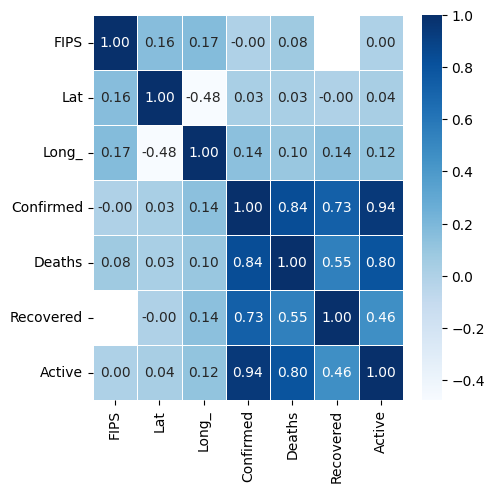

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(numeric_doc.corr(), annot=True, fmt = ".2f", linewidths=0.5, cmap="Blues")

In [12]:
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,4,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,46,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,7,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,192,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [13]:
countries = doc["Country_Region"]
countries.head()

,Country_Region
0,US
1,US
2,US
3,US
4,US


In [14]:
print(countries.size, countries.count())

2522 2522


In [15]:
print(countries.unique(), len(countries.unique()))

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'It

In [16]:
countries.value_counts()

,count
Country_Region,
US,2228
China,34
United Kingdom,18
Malaysia,17
Canada,16
...,...
Ghana,1
Greece,1
Grenada,1


In [17]:
covid_stat = doc[["Confirmed", "Deaths", "Recovered"]]
covid_stat.head()

,Confirmed,Deaths,Recovered
0,4,0,0
1,47,1,0
2,7,0,0
3,195,3,0
4,1,0,0


In [20]:
doc_us = doc[doc["Country_Region"] == "US"]
doc_us

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,4,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,46,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,7,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,192,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,66000.0,NaN,Guam,US,2020-04-01 21:58:49,13.444300,144.793700,77,3,0,74,"Guam, US"
2273,NaN,NaN,Northern Mariana Islands,US,2020-04-01 21:58:49,15.097900,145.673900,2,0,0,2,",Northern Mariana Islands,US"
2280,NaN,NaN,Puerto Rico,US,2020-04-01 21:58:49,18.220800,-66.590100,286,11,0,275,"Puerto Rico, US"
2285,NaN,NaN,Recovered,US,2020-04-01 21:58:49,0.000000,0.000000,0,0,8474,0,"Recovered, US"


In [21]:
doc.isnull().sum()

,0
FIPS,347
Admin2,301
Province_State,184
Country_Region,0
Last_Update,0
Lat,4
Long_,4
Confirmed,0
Deaths,0
Recovered,0


In [22]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv

--2024-08-29 01:15:59--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3247 (3.2K) [text/plain]
Saving to: ‘01-22-2020.csv’

01-22-2020.csv      100%[===================>]   3.17K  --.-KB/s    in 0s      

2024-08-29 01:15:59 (32.5 MB/s) - ‘01-22-2020.csv’ saved [3247/3247]



In [23]:
doc = pd.read_csv("01-22-2020.csv")
doc.isnull().sum()

,0
Province/State,12
Country/Region,0
Last Update,0
Confirmed,10
Deaths,37
Recovered,37


In [24]:
doc = doc.dropna()
doc.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,28.0
41,Cook Islands,New Zealand,1/22/2020 17:00,0.0,0.0,0.0
43,Johor,Malaysia,1/22/2020 17:00,0.0,0.0,0.0
44,Kedah,Malaysia,1/22/2020 17:00,0.0,0.0,0.0
45,Kelantan,Malaysia,1/22/2020 17:00,0.0,0.0,0.0


In [26]:
doc = pd.read_csv("01-22-2020.csv")
doc = doc.dropna(subset=["Confirmed"])
doc.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN


In [27]:
doc = pd.read_csv("01-22-2020.csv")
doc = doc.fillna(0)
doc.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [28]:
doc = pd.read_csv("01-22-2020.csv")
nan_data = { "Deaths" : 0, "Recovered" : 0}
doc = doc.fillna(nan_data)
doc.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,Gansu,Mainland China,1/22/2020 17:00,NaN,0.0,0.0


In [29]:
doc = pd.read_csv("04-01-2020.csv")
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,4,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,46,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,7,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,192,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [31]:
doc = doc.groupby("Country_Region").sum()
doc.head()

,FIPS,Admin2,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
Country_Region,,,,,,,,,,,
Afghanistan,0.0,0,0,2020-04-01 21:58:34,33.93911,67.709953,192,4,5,183,Afghanistan
Albania,0.0,0,0,2020-04-01 21:58:34,41.15330,20.168300,259,15,67,177,Albania
Algeria,0.0,0,0,2020-04-01 21:58:34,28.03390,1.659600,847,58,61,728,Algeria
Andorra,0.0,0,0,2020-04-01 21:58:34,42.50630,1.521800,390,14,10,366,Andorra
Angola,0.0,0,0,2020-04-01 21:58:34,-11.20270,17.873900,8,2,1,5,Angola


In [32]:
doc.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [33]:
doc.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Winter Olympics 2022',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country_Region', length=190)

In [34]:
doc[doc.index == 'US']

,FIPS,Admin2,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
Country_Region,,,,,,,,,,,
US,65168934.0,AbbevilleAcadiaAccomackAdaAdairAdairAdairAdams...,South CarolinaLouisianaVirginiaIdahoIowaMissou...,2020-04-01 21:58:492020-04-01 21:58:492020-04-...,82956.96013,-197553.963757,216936,5222,8474,209150,"Abbeville, South Carolina, USAcadia, Louisiana..."


In [39]:
doc = pd.read_csv("01-22-2020.csv")
doc

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
...,...,...,...,...,...,...
71,Unknown,United Kingdom,1/22/2020 17:00,0.0,0.0,0.0
72,NaN,Nauru,1/22/2020 17:00,0.0,0.0,0.0
73,Niue,New Zealand,1/22/2020 17:00,0.0,0.0,0.0
74,NaN,Tuvalu,1/22/2020 17:00,0.0,0.0,0.0


In [40]:
doc = doc[["Country/Region", "Confirmed"]]
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  76 non-null     object 
 1   Confirmed       66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [41]:
doc = doc.dropna(subset=["Confirmed"])
doc = doc.astype({"Confirmed" : "int64"})
doc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 75
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  66 non-null     object
 1   Confirmed       66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [42]:
doc.head()

,Country/Region,Confirmed
0,Mainland China,1
1,Mainland China,14
2,Mainland China,6
3,Mainland China,1
5,Mainland China,26


In [43]:
doc = pd.read_csv("01-22-2020.csv")
doc = doc[[ "Country/Region", "Confirmed"]]
doc.columns

Index(['Country/Region', 'Confirmed'], dtype='object')

In [44]:
doc.columns = ["Country_Region", "Conirmed"]
doc.columns

Index(['Country_Region', 'Conirmed'], dtype='object')

In [58]:
!wget -O UID_ISO_FIPS_LookUp_Table.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv

--2024-08-29 02:11:49--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416410 (407K) [text/plain]
Saving to: ‘UID_ISO_FIPS_LookUp_Table.csv’

UID_ISO_FIPS_LookUp 100%[===================>] 406.65K  --.-KB/s    in 0.05s   

2024-08-29 02:11:49 (8.82 MB/s) - ‘UID_ISO_FIPS_LookUp_Table.csv’ saved [416410/416410]



In [60]:
doc = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv', encoding='utf-8-sig')
doc = doc[[ "iso2", "Country_Region"]]
doc

,iso2,Country_Region
0,AF,Afghanistan
1,AL,Albania
2,AQ,Antarctica
3,DZ,Algeria
4,AD,Andorra
...,...,...
4316,US,US
4317,US,US
4318,US,US
4319,US,US


In [61]:
doc.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4316,True
4317,True
4318,True
4319,True


In [63]:
doc[doc.duplicated()]

,iso2,Country_Region
17,BE,Belgium
18,BE,Belgium
19,BE,Belgium
20,BE,Belgium
21,BE,Belgium
...,...,...
4316,US,US
4317,US,US
4318,US,US
4319,US,US


In [65]:
doc = doc.drop_duplicates(subset="Country_Region", keep="last")
doc

,iso2,Country_Region
0,AF,Afghanistan
1,AL,Albania
2,AQ,Antarctica
3,DZ,Algeria
4,AD,Andorra
...,...,...
853,ZW,Zimbabwe
862,AU,Australia
879,CA,Canada
914,MO,China
